## Amanda Worthy's Bike AQ project notebook in R

## Things to do

1. Make a map of the tracker locations and the air monitering locations
2. Import daylight
5. Look at how AQ is influencing biking
    - threshold over 100?? 
    - explore methods for air quality 
6. Take out weekends, holidays

#### Helpful Websites 

Python AQI library
- https://readthedocs.org/projects/python-aqi/downloads/pdf/latest/

People who have done similar projects 
- https://github.com/jakevdp/SeattleBike/blob/master/SeattleCycling.ipynb
- https://www.sciencedirect.com/science/article/pii/S221414052100027X

## Load packages

In [1]:
#library(corrplot)
library(data.table)
library(lubridate)
library(ggplot2)
library(reshape2)
library(scales)
library(zoo)
library(plyr)
library(readr)
library(stats)
library(quantmod)
library(dplyr)
library(readxl)
library(ggplot2)
library(tidyverse)
library(data.table)
library(lubridate)
library(ggplot2)
library(reshape2)
library(scales)
library(zoo)
library(plyr)
library(readr)
library(lubridate)
library(reshape2)
library(scales)
library(broom)
invisible(1:13) # hides it
library(repr)
library(tibble)

options(repr.plot.width=8, repr.plot.height=6) #controls plot size in jupyter


Attaching package: ‘lubridate’

The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following object is masked from ‘package:base’:

    date

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘reshape2’

The following objects are masked from ‘package:data.table’:

    dcast, melt


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘plyr’

The following object is masked from ‘package:lubridate’:

    here


Attaching package: ‘readr’

The following object is masked from ‘package:scales’:

    col_factor

Loading required package: xts
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: ‘xts’

The following objects are masked from ‘package:data.table’:

   

# Air Quality Dataset 

### Locations of the AQ monitering sites: 

10th & Weller: 47.597222, -122.319722, 42

Beacon Hill: 47.568214, -122.308619, 334

### Locations of the Bike Counters: 

Freemont: 47.648137, -122.349868

Spokane Street Bridge: 

### Locations of the SEA Weather Data: 
LATITUDE: 47.44472

LONGITUDE: -122.31361

ELEVATION [ft]: 427

In [53]:
#import dataset 
df<- read.csv("Data/AW_DataDownload_11_14_22.csv")
head(df)
colnames(df)



Site,Date,ParameterType,ParameterName,Units,UnitsFull,Value
Seattle 10th & Weller,6/11/14 4:00,CO,Carbon Monoxide (Trace CO),ppb,Parts per Million,250.1
Seattle 10th & Weller,6/11/14 5:00,CO,Carbon Monoxide (Trace CO),ppb,Parts per Million,399.0
Seattle 10th & Weller,6/11/14 6:00,CO,Carbon Monoxide (Trace CO),ppb,Parts per Million,637.3
Seattle 10th & Weller,6/11/14 7:00,CO,Carbon Monoxide (Trace CO),ppb,Parts per Million,722.8
Seattle 10th & Weller,6/11/14 8:00,CO,Carbon Monoxide (Trace CO),ppb,Parts per Million,673.2
Seattle 10th & Weller,6/11/14 9:00,CO,Carbon Monoxide (Trace CO),ppb,Parts per Million,594.3


[1] "Site"          "Date"          "ParameterType" "ParameterName"
[5] "Units"         "UnitsFull"     "Value"

In [54]:
unit_id= df[c(3:5)]


unit_id =unit_id[!duplicated(unit_id), ]
unit_id

,ParameterType,ParameterName,Units
1,CO,Carbon Monoxide (Trace CO),ppb
64986,NO2,Nitrogen Dioxide (NO2),ppb
132031,Pm25,Pm2.5 MetOne Bam,ug/m3
180569,Pm25,Pm2.5 Teom FEM,ug/m3
204238,Temperature,Temperature 10 m,degF
276833,WindDirection,Wind Direction Sonic,deg(frm N)
349965,WindSpeed,Wind Speed Sonic,mph
481474,NO2,Nitrogen Dioxide(NO2_CAPS),ppb
520482,Ozone,Ozone (uv abs),ppm
701764,SO2,Sulfur Dioxide (Trace SO2),ppb


In [55]:
unique(df$ParameterName)

[1] Carbon Monoxide (Trace CO) Nitrogen Dioxide (NO2)    
 [3] Pm2.5 MetOne Bam           Pm2.5 Teom FEM            
 [5] Temperature 10 m           Wind Direction Sonic      
 [7] Wind Speed Sonic           Nitrogen Dioxide(NO2_CAPS)
 [9] Ozone (uv abs)             Sulfur Dioxide (Trace SO2)
[11] Relative Humidity          Temperature               
[13] Wind Direction Vane        Wind Speed Propeller      
14 Levels: Carbon Monoxide (Trace CO) ... Wind Speed Sonic

In [56]:
df2= df %>% select(Site, Date, ParameterName, Value)
head(df2)
tail(df2)

Site,Date,ParameterName,Value
Seattle 10th & Weller,6/11/14 4:00,Carbon Monoxide (Trace CO),250.1
Seattle 10th & Weller,6/11/14 5:00,Carbon Monoxide (Trace CO),399.0
Seattle 10th & Weller,6/11/14 6:00,Carbon Monoxide (Trace CO),637.3
Seattle 10th & Weller,6/11/14 7:00,Carbon Monoxide (Trace CO),722.8
Seattle 10th & Weller,6/11/14 8:00,Carbon Monoxide (Trace CO),673.2
Seattle 10th & Weller,6/11/14 9:00,Carbon Monoxide (Trace CO),594.3


,Site,Date,ParameterName,Value
1048570,Seattle Beacon Hill,11/13/14 7:00,Wind Speed Sonic,2.7
1048571,Seattle Beacon Hill,11/13/14 8:00,Wind Speed Sonic,2.2
1048572,Seattle Beacon Hill,11/13/14 9:00,Wind Speed Sonic,2.0
1048573,Seattle Beacon Hill,11/13/14 10:00,Wind Speed Sonic,2.6
1048574,Seattle Beacon Hill,11/13/14 11:00,Wind Speed Sonic,2.2
1048575,Seattle Beacon Hill,11/13/14 12:00,Wind Speed Sonic,4.2


In [59]:
wide = df2 %>% 
    spread(ParameterName, Value)
head(wide)
names(wide)[3] <- "CO"
names(wide)[4] <- "NO2"
names(wide)[5] <- "NO2_caps"
names(wide)[6] <- "ozone"
names(wide)[7] <- "PM2.5_MO"
names(wide)[8] <- "PM2.5_FEM"
names(wide)[9] <- "RH"
names(wide)[10] <- "SO2"
names(wide)[11] <- "Temperature"
names(wide)[12] <- "Temperature_10_m"
names(wide)[13] <- "Wind_Direction_s"
names(wide)[14] <- "Wind_Direction_v"
names(wide)[15] <- "Wind_Speed_p"
names(wide)[16] <- "Wind_Speed_s"
tail(wide)

Site,Date,Carbon Monoxide (Trace CO),Nitrogen Dioxide (NO2),Nitrogen Dioxide(NO2_CAPS),Ozone (uv abs),Pm2.5 MetOne Bam,Pm2.5 Teom FEM,Relative Humidity,Sulfur Dioxide (Trace SO2),Temperature,Temperature 10 m,Wind Direction Sonic,Wind Direction Vane,Wind Speed Propeller,Wind Speed Sonic
Seattle 10th & Weller,1/1/15 0:00,699.3,27.86,NA,NA,NA,25.5,NA,NA,NA,32,26,NA,NA,2.8
Seattle 10th & Weller,1/1/15 10:00,572.9,13.06,NA,NA,NA,8.6,NA,NA,NA,34,106,NA,NA,2.9
Seattle 10th & Weller,1/1/15 11:00,738.8,20.25,NA,NA,NA,12.8,NA,NA,NA,37,127,NA,NA,2.9
Seattle 10th & Weller,1/1/15 12:00,1055.1,31.14,NA,NA,NA,19.8,NA,NA,NA,39,221,NA,NA,3.0
Seattle 10th & Weller,1/1/15 13:00,989.5,34.18,NA,NA,NA,16.3,NA,NA,NA,41,226,NA,NA,3.2
Seattle 10th & Weller,1/1/15 14:00,992.7,31.02,NA,NA,NA,15.3,NA,NA,NA,42,225,NA,NA,3.0


,Site,Date,CO,NO2,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,RH,SO2,Temperature,Temperature_10_m,Wind_Direction_s,Wind_Direction_v,Wind_Speed_p,Wind_Speed_s
167592,Seattle Beacon Hill,9/9/22 4:00,108.3,NA,5.19,0.02,4,NA,NA,13.2,NA,57,31,NA,NA,NA
167593,Seattle Beacon Hill,9/9/22 5:00,131.7,NA,6.90,0.01,4,NA,NA,0.7,NA,57,25,NA,NA,NA
167594,Seattle Beacon Hill,9/9/22 6:00,148.7,NA,7.86,0.01,5,NA,NA,0.8,NA,57,26,NA,NA,NA
167595,Seattle Beacon Hill,9/9/22 7:00,151.5,NA,8.19,0.01,6,NA,NA,0.7,NA,59,27,NA,NA,NA
167596,Seattle Beacon Hill,9/9/22 8:00,162.4,NA,8.07,0.01,4,NA,NA,0.6,NA,61,30,NA,NA,NA
167597,Seattle Beacon Hill,9/9/22 9:00,167.7,NA,6.78,0.02,4,NA,NA,0.6,NA,64,36,NA,NA,NA


In [58]:
#Merge percipitation w AQ data 
try(system("pwd", intern = TRUE))

[1] "/Users/amandaworthy/Bikey bike/Bike_Counters_Air_Quality"

In [22]:
#percip<- read.csv("Data/percip.csv")
#head(percip )
#colnames(percip)

In [23]:
#percip$Date <- cut(as.POSIXct(paste(percip$Date_Time)), breaks="hour") 
#percip$Date <- round_date(as.POSIXct(percip$Date_Time), "hour") 
#head(percip)


In [24]:
#percip2= aggregate(cbind(precip_accum_one_hour_set_1) ~ Date, percip, mean)
#head(percip2)

#write.csv(percip2, "Data/percip2.csv")

In [25]:
percip3<- read.csv("Data/percip2.csv")
head(percip3)

Date,precip_accum_one_hour_set_1
10/26/10 13:00,0.03
10/26/10 14:00,0.03
10/26/10 15:00,0.03
10/26/10 16:00,0.03
10/26/10 17:00,0.25
10/26/10 18:00,1.02


In [26]:
head(wide)

Site,Date,CO,NO2,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,RH,SO2,Temperature,Temperature_10_m,Wind_Direction_s,Wind_Direction_v,Wind_Speed_p,Wind_Speed_s
Seattle 10th & Weller,1/1/15 0:00,699.3,27.86,NA,NA,NA,25.5,NA,NA,NA,32,26,NA,NA,2.8
Seattle 10th & Weller,1/1/15 10:00,572.9,13.06,NA,NA,NA,8.6,NA,NA,NA,34,106,NA,NA,2.9
Seattle 10th & Weller,1/1/15 11:00,738.8,20.25,NA,NA,NA,12.8,NA,NA,NA,37,127,NA,NA,2.9
Seattle 10th & Weller,1/1/15 12:00,1055.1,31.14,NA,NA,NA,19.8,NA,NA,NA,39,221,NA,NA,3.0
Seattle 10th & Weller,1/1/15 13:00,989.5,34.18,NA,NA,NA,16.3,NA,NA,NA,41,226,NA,NA,3.2
Seattle 10th & Weller,1/1/15 14:00,992.7,31.02,NA,NA,NA,15.3,NA,NA,NA,42,225,NA,NA,3.0


In [67]:
wide2 <- merge(wide, percip3, by="Date", how= 'right')
head(wide2)

dim(wide)
dim(wide2)

Date,Site,CO,NO2,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,RH,SO2,Temperature,Temperature_10_m,Wind_Direction_s,Wind_Direction_v,Wind_Speed_p,Wind_Speed_s,precip_accum_one_hour_set_1
1/1/12 10:00,Seattle Beacon Hill,NA,NA,NA,0.00,NA,6.9,69,NA,46,NA,NA,318,2.4,NA,0.030
1/1/12 11:00,Seattle Beacon Hill,NA,NA,NA,0.00,NA,5.1,67,NA,47,NA,NA,314,3.6,NA,0.030
1/1/12 12:00,Seattle Beacon Hill,NA,NA,NA,0.01,NA,5.4,58,NA,50,NA,NA,306,3.4,NA,0.030
1/1/12 9:00,Seattle Beacon Hill,NA,NA,NA,0.01,NA,11.0,72,NA,43,NA,NA,30,1.3,NA,0.030
1/1/14 0:00,Seattle Beacon Hill,NA,NA,NA,NA,NA,11.3,NA,NA,NA,NA,NA,NA,NA,NA,0.030
1/1/17 10:00,Seattle 10th & Weller,375.3,13.59,NA,NA,NA,4.3,NA,NA,NA,33,22,NA,NA,3.9,0.946


[1] 167597     16

[1] 31352    17

In [68]:
#write.csv(wide, "Data/AQ_Percip.csv", row.names = FALSE) # row.names = FALSE to remove index 

# subset weller data (closer to freemont) 


In [28]:
weller <-subset(wide2, Site == 'Seattle 10th & Weller')
weller= weller %>% select_if(~ !all(is.na(.)))

weller

,Date,Site,CO,NO2,PM2.5_MO,PM2.5_FEM,Temperature_10_m,Wind_Direction_s,Wind_Speed_s,precip_accum_one_hour_set_1
6,1/1/17 10:00,Seattle 10th & Weller,375.3,13.59,NA,4.3,33,22,3.9,0.9460000
8,1/1/17 11:00,Seattle 10th & Weller,285.4,8.02,NA,6.3,35,50,5.6,1.7350000
11,1/1/17 12:00,Seattle 10th & Weller,272.0,7.18,NA,3.4,35,48,5.3,2.1018182
12,1/1/17 13:00,Seattle 10th & Weller,299.1,8.18,NA,5.3,37,30,4.1,1.4053846
15,1/1/17 14:00,Seattle 10th & Weller,295.3,9.26,NA,4.9,37,35,4.4,0.2500000
16,1/1/17 15:00,Seattle 10th & Weller,306.0,10.10,NA,4.0,35,65,3.9,0.0300000
18,1/1/17 16:00,Seattle 10th & Weller,378.3,13.23,NA,6.0,34,67,3.0,0.0300000
21,1/1/17 18:00,Seattle 10th & Weller,424.1,14.93,NA,7.6,32,60,2.5,0.0300000
23,1/1/17 1:00,Seattle 10th & Weller,NA,NA,NA,1.6,33,87,2.0,0.1600000
24,1/1/17 2:00,Seattle 10th & Weller,598.4,13.72,NA,4.9,33,132,1.9,0.3366667


In [32]:
#Import Freemont Bike Dataset 

fbike<- read.csv("Data/Fremont_Bridge_Bicycle_Counter.csv")
colnames(fbike)

head(fbike)

[1] "Date"                         "Fremont.Bridge.Total"        
[3] "Fremont.Bridge.East.Sidewalk" "Fremont.Bridge.West.Sidewalk"

Date,Fremont.Bridge.Total,Fremont.Bridge.East.Sidewalk,Fremont.Bridge.West.Sidewalk
8/1/22 0:00,23,7,16
8/1/22 1:00,12,5,7
8/1/22 2:00,3,0,3
8/1/22 3:00,5,2,3
8/1/22 4:00,10,2,8
8/1/22 5:00,27,5,22


# Freemont Bridge and AQ in FAQ

In [33]:
# Merge Bike and Weather Data for Freemont

faq <- merge(fbike, weller, by="Date")
head(faq)

Date,Fremont.Bridge.Total,Fremont.Bridge.East.Sidewalk,Fremont.Bridge.West.Sidewalk,Site,CO,NO2,PM2.5_MO,PM2.5_FEM,Temperature_10_m,Wind_Direction_s,Wind_Speed_s,precip_accum_one_hour_set_1
1/1/17 10:00,13,7,6,Seattle 10th & Weller,375.3,13.59,NA,4.3,33,22,3.9,0.946000
1/1/17 11:00,21,9,12,Seattle 10th & Weller,285.4,8.02,NA,6.3,35,50,5.6,1.735000
1/1/17 12:00,25,17,8,Seattle 10th & Weller,272.0,7.18,NA,3.4,35,48,5.3,2.101818
1/1/17 13:00,35,19,16,Seattle 10th & Weller,299.1,8.18,NA,5.3,37,30,4.1,1.405385
1/1/17 14:00,42,16,26,Seattle 10th & Weller,295.3,9.26,NA,4.9,37,35,4.4,0.250000
1/1/17 15:00,40,29,11,Seattle 10th & Weller,306.0,10.10,NA,4.0,35,65,3.9,0.030000


In [38]:
faq[, c(2:4,6:13)] <- sapply(faq [, c(2:4,6:13)], as.numeric)
faq

Date,Fremont.Bridge.Total,Fremont.Bridge.East.Sidewalk,Fremont.Bridge.West.Sidewalk,Site,CO,NO2,PM2.5_MO,PM2.5_FEM,Temperature_10_m,Wind_Direction_s,Wind_Speed_s,precip_accum_one_hour_set_1
1/1/17 10:00,13,7,6,Seattle 10th & Weller,375.3,13.59,NA,4.3,33,22,3.9,0.9460000
1/1/17 11:00,21,9,12,Seattle 10th & Weller,285.4,8.02,NA,6.3,35,50,5.6,1.7350000
1/1/17 12:00,25,17,8,Seattle 10th & Weller,272.0,7.18,NA,3.4,35,48,5.3,2.1018182
1/1/17 13:00,35,19,16,Seattle 10th & Weller,299.1,8.18,NA,5.3,37,30,4.1,1.4053846
1/1/17 14:00,42,16,26,Seattle 10th & Weller,295.3,9.26,NA,4.9,37,35,4.4,0.2500000
1/1/17 15:00,40,29,11,Seattle 10th & Weller,306.0,10.10,NA,4.0,35,65,3.9,0.0300000
1/1/17 16:00,32,21,11,Seattle 10th & Weller,378.3,13.23,NA,6.0,34,67,3.0,0.0300000
1/1/17 18:00,16,7,9,Seattle 10th & Weller,424.1,14.93,NA,7.6,32,60,2.5,0.0300000
1/1/17 1:00,19,5,14,Seattle 10th & Weller,NA,NA,NA,1.6,33,87,2.0,0.1600000
1/1/17 2:00,1,1,0,Seattle 10th & Weller,598.4,13.72,NA,4.9,33,132,1.9,0.3366667


In [39]:
sumfaq <- summary(faq)
print(sumfaq)

           Date       Fremont.Bridge.Total Fremont.Bridge.East.Sidewalk
 1/1/17 10:00:    1   Min.   :  0.00       Min.   :  0.00              
 1/1/17 11:00:    1   1st Qu.:  8.00       1st Qu.:  4.00              
 1/1/17 12:00:    1   Median : 36.00       Median : 16.00              
 1/1/17 13:00:    1   Mean   : 73.08       Mean   : 31.41              
 1/1/17 14:00:    1   3rd Qu.: 93.00       3rd Qu.: 40.00              
 1/1/17 15:00:    1   Max.   :855.00       Max.   :504.00              
 (Other)     :13138                                                    
 Fremont.Bridge.West.Sidewalk                    Site             CO        
 Min.   :  0.00               Seattle 10th & Weller:13144   Min.   :-444.8  
 1st Qu.:  4.00               Seattle Beacon Hill  :    0   1st Qu.: 258.4  
 Median : 19.00                                             Median : 353.2  
 Mean   : 41.66                                             Mean   : 387.3  
 3rd Qu.: 50.00                        

In [ ]:
ggplot(data = faq, aes(x = Fremont.Bridge.Total, y = PM2.5_MO))+
  geom_point(color = "#00AFBB", size = 2)

# subset beacon data (closer to SS) 


In [40]:
beacon <-subset(wide2, Site == 'Seattle Beacon Hill')
beacon= beacon %>% select_if(~ !all(is.na(.)))

head(beacon)

,Date,Site,CO,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,RH,SO2,Temperature,Temperature_10_m,Wind_Direction_s,Wind_Direction_v,Wind_Speed_p,Wind_Speed_s,precip_accum_one_hour_set_1
1,1/1/12 10:00,Seattle Beacon Hill,NA,NA,0.00,NA,6.9,69,NA,46,NA,NA,318,2.4,NA,0.030
2,1/1/12 11:00,Seattle Beacon Hill,NA,NA,0.00,NA,5.1,67,NA,47,NA,NA,314,3.6,NA,0.030
3,1/1/12 12:00,Seattle Beacon Hill,NA,NA,0.01,NA,5.4,58,NA,50,NA,NA,306,3.4,NA,0.030
4,1/1/12 9:00,Seattle Beacon Hill,NA,NA,0.01,NA,11.0,72,NA,43,NA,NA,30,1.3,NA,0.030
5,1/1/14 0:00,Seattle Beacon Hill,NA,NA,NA,NA,11.3,NA,NA,NA,NA,NA,NA,NA,NA,0.030
7,1/1/17 10:00,Seattle Beacon Hill,240.6,NA,0.02,NA,8.3,100,0.1,NA,32,30,NA,NA,NA,0.946


In [41]:
#Import Spokane Street Bike Dataset 
ssbike<- read.csv("Data/Spokane_St_Bridge_Bicycle_Counter.csv")


head(ssbike)
colnames(ssbike)


Date,Spokane.St..Bridge.Total,West,East
6/1/20 0:00,2,2,0
6/1/20 1:00,1,0,1
6/1/20 2:00,2,2,0
6/1/20 3:00,1,0,1
6/1/20 4:00,3,1,2
6/1/20 5:00,36,5,31


[1] "Date"                     "Spokane.St..Bridge.Total"
[3] "West"                     "East"

# Spoakane Bridge and AQ in SAQ

In [42]:
saq <- merge(ssbike,beacon, by="Date")
colnames(saq)

saq= saq %>% select_if(~ !all(is.na(.)))
saq[, c(2:4,6:19)] <- sapply(saq [, c(2:4,6:19)], as.numeric)

head(saq)

[1] "Date"                        "Spokane.St..Bridge.Total"   
 [3] "West"                        "East"                       
 [5] "Site"                        "CO"                         
 [7] "NO2_caps"                    "ozone"                      
 [9] "PM2.5_MO"                    "PM2.5_FEM"                  
[11] "RH"                          "SO2"                        
[13] "Temperature"                 "Temperature_10_m"           
[15] "Wind_Direction_s"            "Wind_Direction_v"           
[17] "Wind_Speed_p"                "Wind_Speed_s"               
[19] "precip_accum_one_hour_set_1"

Date,Spokane.St..Bridge.Total,West,East,Site,CO,NO2_caps,ozone,PM2.5_MO,PM2.5_FEM,RH,SO2,Temperature,Temperature_10_m,Wind_Direction_s,Wind_Direction_v,Wind_Speed_p,Wind_Speed_s,precip_accum_one_hour_set_1
1/1/14 0:00,0,0,0,Seattle Beacon Hill,NA,NA,NA,NA,11.3,NA,NA,NA,NA,NA,NA,NA,NA,0.030000
1/1/17 10:00,4,4,0,Seattle Beacon Hill,240.6,NA,0.02,NA,8.3,100,0.1,NA,32,30,NA,NA,NA,0.946000
1/1/17 11:00,3,1,2,Seattle Beacon Hill,226.5,NA,0.02,NA,7.4,100,0.1,NA,33,63,NA,NA,NA,1.735000
1/1/17 12:00,4,3,1,Seattle Beacon Hill,196.0,NA,0.02,NA,6.3,100,0.1,NA,34,51,NA,NA,NA,2.101818
1/1/17 13:00,9,3,6,Seattle Beacon Hill,213.6,NA,0.02,NA,6.4,92,0.1,NA,35,21,NA,NA,NA,1.405385
1/1/17 14:00,11,3,8,Seattle Beacon Hill,229.9,NA,0.02,NA,7.3,95,0.1,NA,35,45,NA,NA,NA,0.250000


In [43]:
dim(saq)

[1] 13974    19

Warning message:
“Removed 9942 rows containing missing values (geom_point).”

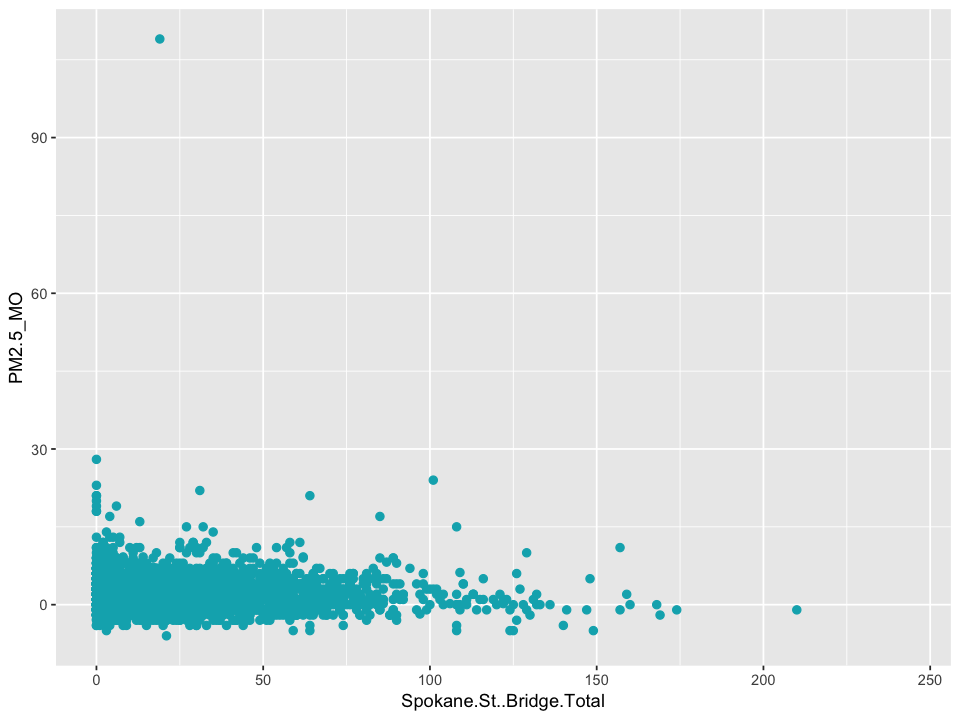

In [44]:
ggplot(data = saq, aes(x = Spokane.St..Bridge.Total, y = PM2.5_MO))+
  geom_point(color = "#00AFBB", size = 2)

In [45]:
colnames(saq)

[1] "Date"                        "Spokane.St..Bridge.Total"   
 [3] "West"                        "East"                       
 [5] "Site"                        "CO"                         
 [7] "NO2_caps"                    "ozone"                      
 [9] "PM2.5_MO"                    "PM2.5_FEM"                  
[11] "RH"                          "SO2"                        
[13] "Temperature"                 "Temperature_10_m"           
[15] "Wind_Direction_s"            "Wind_Direction_v"           
[17] "Wind_Speed_p"                "Wind_Speed_s"               
[19] "precip_accum_one_hour_set_1"

In [46]:
saq2= saq %>% 
  select('Spokane.St..Bridge.Total', 'PM2.5_MO','CO', 'RH', 'SO2','ozone',)
#head(saq2)

saq2= drop_na(saq2)

corr_all<- round(cor(saq2, method = c("spearman")), 3)
corr_all
#corrplot(corr_all, type="upper")


,Spokane.St..Bridge.Total,PM2.5_MO,CO,RH,SO2,ozone
Spokane.St..Bridge.Total,1.000,-0.037,0.202,-0.323,0.207,-0.072
PM2.5_MO,-0.037,1.000,0.331,-0.013,0.078,-0.276
CO,0.202,0.331,1.000,0.235,0.128,-0.611
RH,-0.323,-0.013,0.235,1.000,-0.130,-0.392
SO2,0.207,0.078,0.128,-0.130,1.000,-0.179
ozone,-0.072,-0.276,-0.611,-0.392,-0.179,1.000


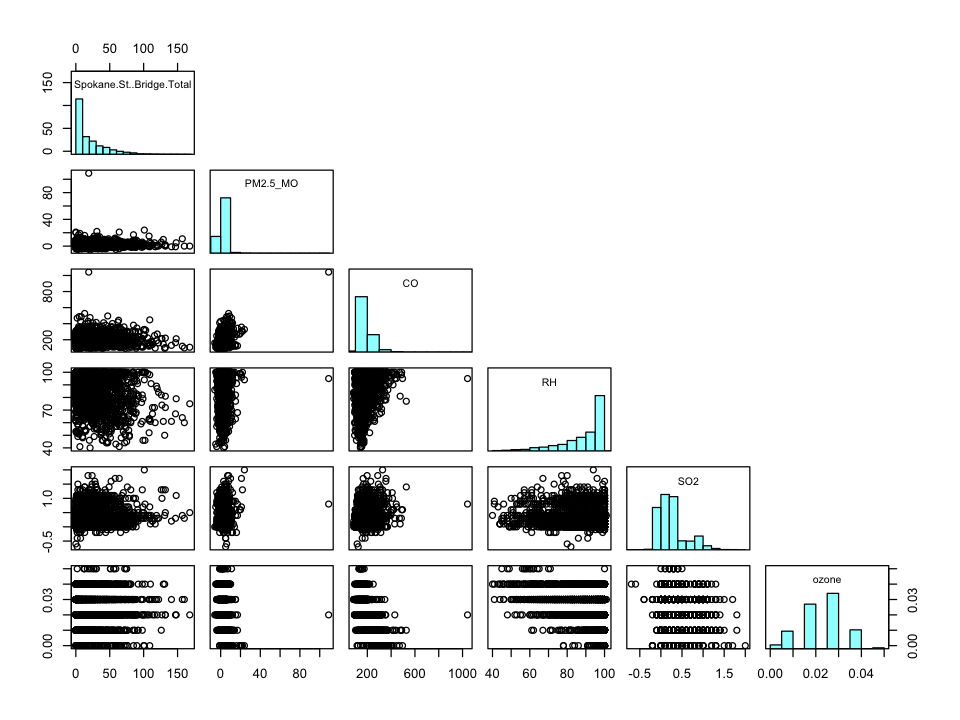

In [47]:
# Function to add histograms
panel.hist <- function(x, ...) {
    usr <- par("usr")
    on.exit(par(usr))
    par(usr = c(usr[1:2], 0, 1.5))
    his <- hist(x, plot = FALSE)
    breaks <- his$breaks
    nB <- length(breaks)
    y <- his$counts
    y <- y/max(y)
    rect(breaks[-nB], 0, breaks[-1], y, col = rgb(0, 1, 1, alpha = 0.5), ...)
    # lines(density(x), col = 2, lwd = 2) # Uncomment to add density lines
}

# Creating the scatter plot matrix
pairs(saq2,
      upper.panel = NULL,         # Disabling the upper panel
      diag.panel = panel.hist)    # Adding the histograms

In [48]:
sumfaq <- summary(faq)
print(sumfaq)

           Date       Fremont.Bridge.Total Fremont.Bridge.East.Sidewalk
 1/1/17 10:00:    1   Min.   :  0.00       Min.   :  0.00              
 1/1/17 11:00:    1   1st Qu.:  8.00       1st Qu.:  4.00              
 1/1/17 12:00:    1   Median : 36.00       Median : 16.00              
 1/1/17 13:00:    1   Mean   : 73.08       Mean   : 31.41              
 1/1/17 14:00:    1   3rd Qu.: 93.00       3rd Qu.: 40.00              
 1/1/17 15:00:    1   Max.   :855.00       Max.   :504.00              
 (Other)     :13138                                                    
 Fremont.Bridge.West.Sidewalk                    Site             CO        
 Min.   :  0.00               Seattle 10th & Weller:13144   Min.   :-444.8  
 1st Qu.:  4.00               Seattle Beacon Hill  :    0   1st Qu.: 258.4  
 Median : 19.00                                             Median : 353.2  
 Mean   : 41.66                                             Mean   : 387.3  
 3rd Qu.: 50.00                        

In [49]:
sumsaq <- summary(saq)
print(sumsaq)

           Date       Spokane.St..Bridge.Total      West       
 1/1/14 0:00 :    1   Min.   :  0.00           Min.   :  0.00  
 1/1/17 10:00:    1   1st Qu.:  3.00           1st Qu.:  1.00  
 1/1/17 11:00:    1   Median : 10.00           Median :  4.00  
 1/1/17 12:00:    1   Mean   : 21.04           Mean   : 10.29  
 1/1/17 13:00:    1   3rd Qu.: 28.00           3rd Qu.: 10.00  
 1/1/17 14:00:    1   Max.   :244.00           Max.   :201.00  
 (Other)     :13968   NA's   :260              NA's   :86      
      East                           Site             CO        
 Min.   :  0.00   Seattle 10th & Weller:    0   Min.   :  80.3  
 1st Qu.:  1.00   Seattle Beacon Hill  :13974   1st Qu.: 150.8  
 Median :  4.00                                 Median : 178.0  
 Mean   : 10.56                                 Mean   : 194.3  
 3rd Qu.: 11.00                                 3rd Qu.: 218.1  
 Max.   :224.00                                 Max.   :1050.9  
 NA's   :86                      